## Part 1 - Site Selection
#### Notebook outline:

This notebook details the function that helped to determine the control site and sample sites. As data for vegetation classes for the whole Amazon only came in large raster files, it became necessary to find information about the locations of deforestation in a smaller file format. Using data from Terrabrasilias, the sample sites were selected along the Arc of Deforestation.

This function requires the following libraries:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap

from shapely.geometry import Polygon

import geopandas as gpd

import pandas as pd
import numpy as np

import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

##### Function:


In [4]:
def deforestation_map(size,colour_deforestation,c1_origin,c1_size,s1_origin,s1_size,s2_origin,s2_size,s3_origin,s3_size):

    '''
    This function plots deforestation using colour grading to show the 'age' of the deforestation from 2008 to 2022. The function allows for the drawing of sample sites via bounding boxes. 

    Variables:

    size = size of the figure
    colour = colourmap from matplotlib for deforestation age gradient
    c1_origin = bottom left origin of control site
    c1_size = size of control site
    s1_origin = bottom left origin of sample site 1 in geographic coordinates
    s1_size = size of sample site 1 in geographic coordinates
    s2_origin = bottom left origin of sample site 2 in geographic coordinates
    s2_size = size of sample site 2 in geographic coordinates
    s3_origin = bottom left origin of sample site 3 in geographic coordinates
    s3_size = size of sample site 3  in geographic coordinates
    
    Datasources:
    
    1. The Deforestation shapefile comes from TerraBrasilis at http://terrabrasilis.dpi.inpe.br/geonetwork/srv/eng/catalog.search#/metadata/b75b83db-8026-43f9-9537-ee1dfa308158
    2. The Amazon biome border shapefile comes from TerraBrasilis at http://terrabrasilis.dpi.inpe.br/geonetwork/srv/eng/catalog.search#/metadata/0d88678e-4cdb-44f3-9b1d-8edc00bc4122
    
    '''
    #Import shapefiles

    bordersf = gpd.read_file('amazon_biome_border.shp')
    deforestationsf = gpd.read_file('yearly_deforestation_biome.shp')

    # Changing the projection of the border to PlateCaree (WGS84)

    bordersf_proj = bordersf.copy().to_crs(epsg=4326)

    # plot the map
    # Defining the figure
    fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

    # Set up the projection

    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set up the extent of the plot

    ax.set_extent([-90, -30, -20, 15], ccrs.PlateCarree())

    m = Basemap(projection='cyl',
            resolution=None, llcrnrlon=-90, llcrnrlat=-20, urcrnrlon=-30, urcrnrlat=15, ax=ax)
    m.shadedrelief()

    #Set up grid and lon/lat labels

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.1, color='k', alpha=1, 
                      linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8} 

    plt.title("Sample and Control Sites")
    
    # Plot Shapefile
    # ax=plt.gca means that you are plotting along the axes you defined

    yearly_deforestation = deforestationsf.plot(ax=plt.gca(), column="year", 
                                                cmap =colour_deforestation, 
                                                zorder = 3, legend=True,
                                                edgecolor='face',
                                                linewidth=0.5, 
                                                legend_kwds={"label": "Deforestation Year",
                                                             "orientation": "horizontal",
                                                             "pad":0.03,
                                                             'shrink': 0.8})
        
    amazon_biome_border = bordersf_proj.plot(ax=plt.gca(), linewidth=1, color='none', edgecolor='darkred', zorder = 4)
    
    
    #draw site bounding box
    plt.gca().add_patch(Rectangle((c1_origin), c1_size, c1_size, facecolor="none", edgecolor="black", linewidth=1, zorder = 5))
    plt.gca().add_patch(Rectangle((s1_origin), s1_size, s1_size, facecolor="none", edgecolor="magenta", linewidth=1, zorder = 5))
    plt.gca().add_patch(Rectangle((s2_origin), s2_size, s2_size, facecolor="none", edgecolor="aqua", linewidth=1, zorder = 5))
    plt.gca().add_patch(Rectangle((s3_origin), s2_size, s2_size, facecolor="none", edgecolor="blueviolet", linewidth=1, zorder = 5))


    # add legend for the sites
    control_site = mpatches.Patch(color="black", label='Control site')
    sample_site_1 = mpatches.Patch(color="magenta", label='Sample Site 1')
    sample_site_2 = mpatches.Patch(color="aqua", label='Sample Site 2')
    sample_site_3 = mpatches.Patch(color="blueviolet", label='Sample Site 3')
    
    plt.legend(handles=[control_site, sample_site_1, sample_site_2, sample_site_3])
    
    
    # Add map features with Cartopy 
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                                edgecolor='face', 
                                                facecolor='none'))
    ax.coastlines(linewidth=0.5)
    ax.add_feature(cartopy.feature.RIVERS, edgecolor="cadetblue")
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)


    #Save as PDF file

    plt.savefig('Site_Selection_Map_.png')

    return

### Overall Map

C:\Users\rebek\anaconda3\envs\ENVI5809\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\rebek\anaconda3\envs\ENVI5809\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


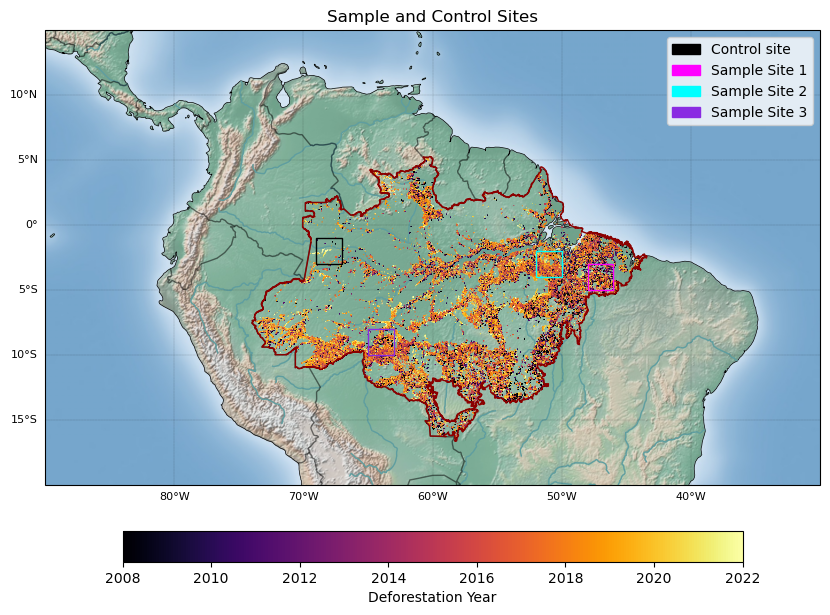

In [5]:
deforestation_map((10, 20),'inferno',(-69,-3),2,(-48,-5),2,(-52,-4),2,(-65,-10),2)